## 前言

豆瓣top250榜单进行分析，看都有哪些电影，评分怎么样，电影的类型都有哪些，电影上映日期分布是怎样的，哪个国家/地区发行的电影比较多。

In [1]:
# 导入常用库
import warnings
import pandas as pd
import numpy as np
import re
import pyecharts as pe
import collections
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 图表可以显示中文
warnings.filterwarnings('ignore')

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\Program Files (x86)\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'

Bad key "text.kerning_factor" on line 4 in
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 数据概览

In [2]:
# 读取 Excel 数据
df = pd.read_excel('豆瓣电影top250.xlsx')
df.head()  # 查看前5行

,Unnamed: 0,电影名称,电影其他信息,导演,编剧,主演,类型,制片国家/地区,语言,上映日期,片长,又名,IMDb链接,评分,评分人数,官方网站,官方小站
0,0,肖申克的救赎 The Shawshank Redemption,"['', '导演:弗兰克·德拉邦特', '编剧:弗兰克·德拉邦特/斯蒂芬·金', '主演:蒂...",弗兰克·德拉邦特,弗兰克·德拉邦特/斯蒂芬·金,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,剧情/犯罪,美国,英语,1994-09-10(多伦多电影节)/1994-10-14(美国),142分钟,月黑高飞(港)/刺激1995(台)/地狱诺言/铁窗岁月/消香克的救赎,tt0111161,9.7,2100927,NaN,NaN
1,1,霸王别姬,"['', '导演:陈凯歌', '编剧:芦苇/李碧华', '主演:张国荣/张丰毅/巩俐/葛优/...",陈凯歌,芦苇/李碧华,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,剧情/爱情/同性,中国大陆/中国香港,汉语普通话,1993-01-01(中国香港)/1993-07-26(中国大陆),171分钟/155分钟(美国剧场版),再见，我的妾/FarewellMyConcubine,tt0106332,9.6,1557983,NaN,NaN
2,2,阿甘正传 Forrest Gump,"['', '导演:罗伯特·泽米吉斯', '编剧:艾瑞克·罗斯/温斯顿·格鲁姆', '主演:汤...",罗伯特·泽米吉斯,艾瑞克·罗斯/温斯顿·格鲁姆,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,剧情/爱情,美国,英语,1994-06-23(洛杉矶首映)/1994-07-06(美国),142分钟,福雷斯特·冈普,tt0109830,9.5,1587792,NaN,NaN
3,3,这个杀手不太冷 Léon,"['', '导演:吕克·贝松', '编剧:吕克·贝松', '主演:让·雷诺/娜塔莉·波特曼/...",吕克·贝松,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,剧情/动作/犯罪,法国/美国,英语/意大利语/法语,1994-09-14(法国),110分钟(剧场版)/133分钟(国际版),杀手莱昂/终极追杀令(台)/杀手里昂/Leon/Leon,tt0110413,9.4,1775679,NaN,NaN
4,4,泰坦尼克号 Titanic,"['', '导演:詹姆斯·卡梅隆', '编剧:詹姆斯·卡梅隆', '主演:莱昂纳多·迪卡普里...",詹姆斯·卡梅隆,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥/凯特·温丝莱特/比利·赞恩/凯西·贝茨/弗兰西丝·费舍/格劳瑞亚·斯图...,剧情/爱情/灾难,美国,英语/意大利语/德语/俄语,1998-04-03(中国大陆)/1997-11-01(东京电影节)/1997-12-19(美国),194分钟/227分钟(白星版),铁达尼号(港/台),tt0120338,9.4,1540577,NaN,NaN


In [3]:
# 获取数据列名
df.columns

Index(['Unnamed: 0', '电影名称', '电影其他信息', '导演', '编剧', '主演', '类型', '制片国家/地区', '语言',
       '上映日期', '片长', '又名', 'IMDb链接', '评分', '评分人数', '官方网站', '官方小站'],
      dtype='object')

In [4]:
# 选取需要的几列进行分析
columns_remain = ['电影名称', '导演', '主演', '类型',
                  '制片国家/地区', '上映日期', '片长', '评分', '评分人数']
df = df[columns_remain]

# 增加一列豆瓣排名
df['豆瓣排名'] = list(np.arange(1, 251))
df.head()

,电影名称,导演,主演,类型,制片国家/地区,上映日期,片长,评分,评分人数,豆瓣排名
0,肖申克的救赎 The Shawshank Redemption,弗兰克·德拉邦特,蒂姆·罗宾斯/摩根·弗里曼/鲍勃·冈顿/威廉姆·赛德勒/克兰西·布朗/吉尔·贝罗斯/马克·罗...,剧情/犯罪,美国,1994-09-10(多伦多电影节)/1994-10-14(美国),142分钟,9.7,2100927,1
1,霸王别姬,陈凯歌,张国荣/张丰毅/巩俐/葛优/英达/蒋雯丽/吴大维/吕齐/雷汉/尹治/马明威/费振翔/智一桐/...,剧情/爱情/同性,中国大陆/中国香港,1993-01-01(中国香港)/1993-07-26(中国大陆),171分钟/155分钟(美国剧场版),9.6,1557983,2
2,阿甘正传 Forrest Gump,罗伯特·泽米吉斯,汤姆·汉克斯/罗宾·怀特/加里·西尼斯/麦凯尔泰·威廉逊/莎莉·菲尔德/海利·乔·奥斯蒙/迈...,剧情/爱情,美国,1994-06-23(洛杉矶首映)/1994-07-06(美国),142分钟,9.5,1587792,3
3,这个杀手不太冷 Léon,吕克·贝松,让·雷诺/娜塔莉·波特曼/加里·奥德曼/丹尼·爱罗/彼得·阿佩尔/迈克尔·巴达鲁科/艾伦·格...,剧情/动作/犯罪,法国/美国,1994-09-14(法国),110分钟(剧场版)/133分钟(国际版),9.4,1775679,4
4,泰坦尼克号 Titanic,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥/凯特·温丝莱特/比利·赞恩/凯西·贝茨/弗兰西丝·费舍/格劳瑞亚·斯图...,剧情/爱情/灾难,美国,1998-04-03(中国大陆)/1997-11-01(东京电影节)/1997-12-19(美国),194分钟/227分钟(白星版),9.4,1540577,5


In [5]:
# 查看数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   电影名称     250 non-null    object 
 1   导演       250 non-null    object 
 2   主演       249 non-null    object 
 3   类型       250 non-null    object 
 4   制片国家/地区  250 non-null    object 
 5   上映日期     250 non-null    object 
 6   片长       250 non-null    object 
 7   评分       250 non-null    float64
 8   评分人数     250 non-null    int64  
 9   豆瓣排名     250 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


In [6]:
# 判断哪些列有空值
df.isnull().any()

电影名称       False
导演         False
主演          True
类型         False
制片国家/地区    False
上映日期       False
片长         False
评分         False
评分人数       False
豆瓣排名       False
dtype: bool

主演这一列有空值，数据有249条，说明存在1个空值，详细看一下是哪一部电影；  
评分列格式是浮点型，评分人数是整型，都没有空值，后面可以直接进行分析

In [7]:
# 筛选出主演为空值的数据
df[df['主演'].isnull()]

,电影名称,导演,主演,类型,制片国家/地区,上映日期,片长,评分,评分人数,豆瓣排名
188,二十二,郭柯,NaN,纪录片,中国大陆,2017-08-14(中国大陆)/2015-10-05(釜山电影节)/2016-06-25(...,99分钟(公映版)/112分钟,8.7,218835,189


纪录片《二十二》的主演有空值，这个空值填充“缺失数据”

In [8]:
df['主演'].fillna('缺失数据',inplace=True)
df.isnull().any()

电影名称       False
导演         False
主演         False
类型         False
制片国家/地区    False
上映日期       False
片长         False
评分         False
评分人数       False
豆瓣排名       False
dtype: bool

In [9]:
# 判断是否有重复值
df['电影名称'].duplicated().any()

False

最重要的电影这一列没有重复值

In [10]:
# 查看离散型变量的情况
df.describe()

,评分,评分人数,豆瓣排名
count,250.000000,2.500000e+02,250.000000
mean,8.888000,5.267182e+05,125.500000
std,0.263769,3.352101e+05,72.312977
min,8.400000,9.272100e+04,1.000000
25%,8.700000,3.003325e+05,63.250000
50%,8.800000,4.387350e+05,125.500000
75%,9.100000,6.442718e+05,187.750000
max,9.700000,2.100927e+06,250.000000


评分情况，平均值8.888，最高评分9.7，后面进行可视化处理

## 数据清洗

豆瓣top250榜单详细电影名称

In [11]:
# 获取榜单里电影名称的中文名称
df['电影名称'] = df['电影名称'].apply(lambda x: x.split(' ')[0])
print(df['电影名称'].values.tolist())

['肖申克的救赎', '霸王别姬', '阿甘正传', '这个杀手不太冷', '泰坦尼克号', '美丽人生', '千与千寻', '辛德勒的名单', '盗梦空间', '忠犬八公的故事', '海上钢琴师', '楚门的世界', '三傻大闹宝莱坞', '机器人总动员', '放牛班的春天', '星际穿越', '大话西游之大圣娶亲', '熔炉', '疯狂动物城', '无间道', '龙猫', '教父', '当幸福来敲门', '怦然心动', '触不可及', '控方证人', '蝙蝠侠：黑暗骑士', '活着', '寻梦环游记', '末代皇帝', '乱世佳人', '何以为家', '摔跤吧！爸爸', '指环王3：王者无敌', '飞屋环游记', '少年派的奇幻漂流', '十二怒汉', '鬼子来了', '素媛', '哈尔的移动城堡', '天空之城', '大话西游之月光宝盒', '哈利·波特与魔法石', '天堂电影院', '罗马假日', '闻香识女人', '辩护人', '我不是药神', '搏击俱乐部', '教父2', '死亡诗社', '狮子王', '指环王2：双塔奇兵', '大闹天宫', '猫鼠游戏', '窃听风暴', '指环王1：魔戒再现', '钢琴家', '黑客帝国', '美丽心灵', '两杆大烟枪', '饮食男女', '飞越疯人院', '本杰明·巴顿奇事', '让子弹飞', 'V字仇杀队', '看不见的客人', '绿皮书', '西西里的美丽传说', '小鞋子', '拯救大兵瑞恩', '海蒂和爷爷', '海豚湾', '穿条纹睡衣的男孩', '情书', '音乐之声', '美国往事', '致命魔术', '低俗小说', '七宗罪', '沉默的羔羊', '蝴蝶效应', '禁闭岛', '心灵捕手', '春光乍泄', '布达佩斯大饭店', '被嫌弃的松子的一生', '阿凡达', '摩登时代', '剪刀手爱德华', '勇敢的心', '喜剧之王', '致命ID', '天使爱美丽', '加勒比海盗', '哈利·波特与死亡圣器(下)', '断背山', '杀人回忆', '狩猎', '请以你的名字呼唤我', '幽灵公主', '阳光灿烂的日子', '小森林', '7号房的礼物', '重庆森林', '第六感', '入殓师', '红辣椒', '小森林', '消失的爱人', '爱在黎明破晓前', '一一', '侧耳倾听', 

很多单元格数据是以“/”来分割的，需要转化为列表形式，便于进行分析；  
上映日期只要具体年份（年），片长只要具体时长（分钟）

In [12]:
# 定义函数，将用"/" 分割的数据转化为列表
def conver_list(df, *columns):
    for column in columns:
        df[column] = df[column].str.split('/')
    return df


# 定义函数，用来获取上映日期
def get_date(x):
    find = re.compile('\d{4}')
    date = find.findall(x)[0]
    return date

In [13]:
# '上映日期'和'片长'这两列，取具体的数字
df['上映日期'] = df['上映日期'].apply(get_date)
df['片长'] = df['片长'].map(lambda x: x.split('分钟')[0])

#  '导演', '主演', '类型', '制片国家/地区'，这几列下面的值转化为列表
df = conver_list(df, '导演', '主演', '类型', '制片国家/地区')

df.head()

,电影名称,导演,主演,类型,制片国家/地区,上映日期,片长,评分,评分人数,豆瓣排名
0,肖申克的救赎,[弗兰克·德拉邦特],"[蒂姆·罗宾斯, 摩根·弗里曼, 鲍勃·冈顿, 威廉姆·赛德勒, 克兰西·布朗, 吉尔·贝罗...","[剧情, 犯罪]",[美国],1994,142,9.7,2100927,1
1,霸王别姬,[陈凯歌],"[张国荣, 张丰毅, 巩俐, 葛优, 英达, 蒋雯丽, 吴大维, 吕齐, 雷汉, 尹治, 马...","[剧情, 爱情, 同性]","[中国大陆, 中国香港]",1993,171,9.6,1557983,2
2,阿甘正传,[罗伯特·泽米吉斯],"[汤姆·汉克斯, 罗宾·怀特, 加里·西尼斯, 麦凯尔泰·威廉逊, 莎莉·菲尔德, 海利·乔...","[剧情, 爱情]",[美国],1994,142,9.5,1587792,3
3,这个杀手不太冷,[吕克·贝松],"[让·雷诺, 娜塔莉·波特曼, 加里·奥德曼, 丹尼·爱罗, 彼得·阿佩尔, 迈克尔·巴达鲁...","[剧情, 动作, 犯罪]","[法国, 美国]",1994,110,9.4,1775679,4
4,泰坦尼克号,[詹姆斯·卡梅隆],"[莱昂纳多·迪卡普里奥, 凯特·温丝莱特, 比利·赞恩, 凯西·贝茨, 弗兰西丝·费舍, 格...","[剧情, 爱情, 灾难]",[美国],1998,194,9.4,1540577,5


## 分析及可视化

### 电影上映日期分布情况

In [14]:
# 获取每一年上映的电影数量
list_date = df['上映日期'].tolist()
date_count = collections.Counter(list_date)
print(date_count)

Counter({'2010': 13, '2004': 13, '2013': 11, '2015': 11, '1994': 10, '2011': 10, '2003': 10, '2008': 9, '2018': 9, '2017': 9, '1995': 8, '2006': 8, '1993': 7, '2019': 7, '2009': 7, '2002': 7, '1999': 7, '2014': 6, '2012': 6, '2001': 6, '2005': 6, '1997': 6, '1998': 5, '2016': 5, '2000': 4, '1992': 4, '1991': 4, '2007': 4, '1987': 3, '1988': 3, '1990': 3, '1957': 2, '1953': 2, '1989': 2, '1996': 2, '2020': 1, '1972': 1, '1939': 1, '1974': 1, '1961': 1, '1975': 1, '1965': 1, '1984': 1, '1936': 1, '1983': 1, '1979': 1, '1954': 1, '1986': 1, '1960': 1, '1966': 1, '1952': 1, '1950': 1, '1940': 1, '1968': 1, '1931': 1, '1971': 1})


In [15]:
# 按照电影上映年份进行排序
sort_date_count = sorted(date_count.items(), key=lambda x: x[0])
sort_date_count[:5]

[('1931', 1), ('1936', 1), ('1939', 1), ('1940', 1), ('1950', 1)]

In [16]:
# 将排序后的字典转化为新的列表，作为图表横坐标轴、纵坐标轴
x1 = [x[0] for x in sort_date_count]
y1 = [x[1] for x in sort_date_count]


# 用pyecharts绘制柱状图
bar = pe.Bar('豆瓣top250电影上映年份分布情况', height=500, width=990, title_pos='center')

# is_label_show=True,显示数据标签;is_datazoom_show=True控制条，xaxis_interval=0,所有横坐标标签都显示,xaxis_rotate=60,标签旋转60度
bar.add('', x1, y1, is_label_show=True, is_datazoom_show=True, xaxis_interval=0,
        xaxis_rotate=60, yaxis_name='电影数量', yaxis_name_gap=20, yaxis_name_pos='end')
bar

豆瓣top250电影中，最早的一部是在1931年，名称是卓别林主演的《城市之光》，最新一部是在2020年在中国上映的《美丽人生》，大部分电影上映年份分布在1987年到2019年之间，其中，2004年和2010年最多，都是13部；另外认真看图表可以发现，1993年和1994年，好电影数量比1992年明显上升，2003年和2004年也有类似情况发生。

In [17]:
df[df['上映日期']=='1931']

,电影名称,导演,主演,类型,制片国家/地区,上映日期,片长,评分,评分人数,豆瓣排名
209,城市之光,[查理·卓别林],"[查理·卓别林, 弗吉尼亚·切瑞尔, 佛罗伦斯·李, 亨利·伯格曼, 珍·哈露]","[剧情, 喜剧, 爱情]",[美国],1931,87,9.3,92721,210


In [18]:
df[df['上映日期']=='2020']

,电影名称,导演,主演,类型,制片国家/地区,上映日期,片长,评分,评分人数,豆瓣排名
5,美丽人生,[罗伯托·贝尼尼],"[罗伯托·贝尼尼, 尼可莱塔·布拉斯基, 乔治·坎塔里尼, 朱斯蒂诺·杜拉诺, 赛尔乔·比尼...","[剧情, 喜剧, 爱情, 战争]",[意大利],2020,116,9.5,991942,6


### 电影制片国家地区分布情况

In [19]:
area_list = []
for i in df['制片国家/地区']:
    area_list.extend(i)
area_list[:10]

['美国', '中国大陆', '中国香港', '美国', '法国', '美国', '美国', '意大利', '日本', '美国']

In [20]:
len(area_list)

373

制片国家/地区的总数量超过250,是因为部分电影是多个国家或地区合作的

In [21]:
area_count = collections.Counter(area_list)
print(area_count)

Counter({'美国': 137, '英国': 35, '日本': 34, '中国香港': 28, '中国大陆': 23, '法国': 20, '德国': 18, '韩国': 11, '意大利': 9, '中国台湾': 8, '加拿大': 7, '澳大利亚': 7, '印度': 4, '瑞士': 4, '西班牙': 4, '新西兰': 3, '伊朗': 2, '南非': 2, '瑞典': 2, '巴西': 2, '冰岛': 1, '黎巴嫩': 1, '波兰': 1, '丹麦': 1, '荷兰': 1, '奥地利': 1, '阿根廷': 1, '爱尔兰': 1, '希腊': 1, '泰国': 1, '阿联酋': 1, '捷克': 1, '俄罗斯': 1})


In [22]:
sort_area_count = sorted(area_count.items(), key=lambda x: x[1], reverse=True)
sort_area_count[:5]

[('美国', 137), ('英国', 35), ('日本', 34), ('中国香港', 28), ('中国大陆', 23)]

In [23]:
# 将排序后的字典转化为新的列表，作为横坐标轴、纵坐标轴
x2 = [x[0] for x in sort_area_count]
y2 = [x[1] for x in sort_area_count]


# 用pyecharts绘制柱状图
bar = pe.Bar('豆瓣top250电影制片国家/地区分布情况', '部分电影是多个国家或地区合作',
             height=500, width=980, title_pos='center')


bar.add('', x2, y2, is_label_show=True, xaxis_interval=0, xaxis_rotate=45,
        yaxis_name='电影数量', yaxis_name_gap=20, yaxis_name_pos='end')
bar

豆瓣top250电影，有137部电影是美国出品的，超过一半；接着是英国和日本，中国（含大陆、香港、台湾）出品的有59部。

### 电影类型分布情况

In [24]:
type_list = []
for i in df['类型']:
    type_list.extend(i)

type_count = collections.Counter(type_list)
sort_type_count = sorted(type_count.items(), key=lambda x: x[1], reverse=True)

In [25]:
# 将排序后的字典转化为新的列表，作为横坐标轴、纵坐标轴
x3 = [x[0] for x in sort_type_count]
y3 = [x[1] for x in sort_type_count]

print('250部电影标签总数是：{}，平均每部电影标签数量是：{}。'.format(sum(y3), sum(y3)/250))
print(type_count)
# 用pyecharts绘制柱状图
pie = pe.Pie('豆瓣top250电影类型标签分布情况', '部分电影有多个标签',
             height=750, width=900, title_pos='center')

# 图例放在图表左边
pie.add('', x3, y3, is_label_show=True,
        legend_pos='left', legend_orient='vertical')
pie

250部电影标签总数是：690，平均每部电影标签数量是：2.76。
Counter({'剧情': 183, '爱情': 55, '喜剧': 53, '冒险': 44, '犯罪': 43, '奇幻': 40, '动画': 34, '惊悚': 34, '动作': 33, '悬疑': 30, '科幻': 24, '家庭': 23, '战争': 16, '传记': 15, '历史': 10, '古装': 9, '同性': 8, '音乐': 7, '歌舞': 5, '儿童': 5, '纪录片': 5, '武侠': 4, '西部': 3, '灾难': 2, '情色': 2, '恐怖': 2, '运动': 1})


可以看出，250部电影类型标签众多，有剧情、爱情、犯罪等等，恐怖片也有上榜，是《电锯惊魂》和《惊魂记》。跟制片国家/地区一样，一部电影可能有多个标签，所有类型标签加起来总共有690个，平均每部电影有2.76个标签，26.52%的标签是剧情，并不意味着有26.52%的电影是属于剧情片，实际上，剧情标签数量是183个，意味着250部电影里有183是属于剧情电影，占比达到73.2%，接近3/4。

In [26]:
df[['恐怖' in x for x in df['类型'].tolist()]]['电影名称']

145    电锯惊魂
187     惊魂记
Name: 电影名称, dtype: object

In [27]:
type_count['剧情']

183

### 电影导演分析

In [28]:
director_list = []
for x in df['导演']:
    director_list.extend(x)
director_count = collections.Counter(director_list)
sort_director_count = sorted(
    director_count.items(), key=lambda x: x[1], reverse=True)

x4 = [x[0] for x in sort_director_count]
y4 = [x[1] for x in sort_director_count]

bar = pe.Bar('豆瓣top250导演数量分布情况(前20位导演)', title_pos='center')
bar.add('', x4[:20], y4[:20], is_label_show=True, xaxis_interval=0,
        xaxis_rotate=45, yaxis_name='电影数量', yaxis_name_gap=20, yaxis_name_pos='end', yaxis_max=8)
bar

可以看到，宫崎骏和克里斯托弗·诺兰并列第一，都有7部电影入围豆瓣top250，中国导演李安、王家卫分别有4部电影入围豆瓣top250，刘振伟、姜文分别有3部电影入围豆瓣top250，看一下克里斯托弗·诺兰有哪些电影入围豆瓣top250

In [29]:
df[['克里斯托弗·诺兰' in x for x in df['导演'].tolist()]]['电影名称']

8            盗梦空间
15           星际穿越
26       蝙蝠侠：黑暗骑士
77           致命魔术
116    蝙蝠侠：黑暗骑士崛起
170          记忆碎片
241            追随
Name: 电影名称, dtype: object

### 电影主演分析

In [30]:
actor_list = []
for x in df['主演']:
    actor_list.extend(x)

actor_count = collections.Counter(actor_list)
sort_actor_count = sorted(
    actor_count.items(), key=lambda x: x[1], reverse=True)

x6 = [x[0] for x in sort_actor_count]
y6 = [x[1] for x in sort_actor_count]

bar = pe.Bar('豆瓣top250主演数量分布情况(前20位演员)', title_pos='center')
bar.add('', x6[:20], y6[:20], is_label_show=True, xaxis_interval=0, xaxis_rotate=45,
        yaxis_name='电影数量', yaxis_name_gap=20, yaxis_name_pos='end')
bar

可以看到很多演员主演的电影质量是很高的，中国演员张国荣、梁朝伟主演的电影，分别有8部入围豆瓣top250，周星驰有6部入围；张国荣、梁朝伟一起主演的电影有4部入围，分别是《春光乍泄》、《射雕英雄传之东成西就》、《东邪西毒》、《阿飞正传》。

In [31]:
df[['张国荣' in x for x in df['主演'].tolist()]]['电影名称']

1            霸王别姬
84           春光乍泄
115          倩女幽魂
126    射雕英雄传之东成西就
151          英雄本色
157          纵横四海
171          东邪西毒
218          阿飞正传
Name: 电影名称, dtype: object

In [32]:
df[['梁朝伟' in x for x in df['主演'].tolist()]]['电影名称']

19            无间道
84           春光乍泄
104          重庆森林
126    射雕英雄传之东成西就
167          花样年华
171          东邪西毒
212           色，戒
218          阿飞正传
Name: 电影名称, dtype: object

In [33]:
df[[('梁朝伟' in x and '张国荣' in x)for x in df['主演'].tolist()]]['电影名称']

84           春光乍泄
126    射雕英雄传之东成西就
171          东邪西毒
218          阿飞正传
Name: 电影名称, dtype: object

### 电影片长分析

In [34]:
# 用箱型图查看电影片长分布情况
boxplot = pe.Boxplot('电影片长分布情况', title_pos='center')
time_list = sorted(df['片长'].astype('int').tolist())
_yaxis = boxplot.prepare_data([time_list])
boxplot.add('', ['片长'], _yaxis, islabel_show=True)
boxplot

250部电影片长分布挺集中的，其中，最长的电影有238分钟，最短的只有45分钟，平均片长是118分钟，通过查看数据可以发现，片长最长的是《乱世佳人》，片长最短的是《萤火之森》。

In [35]:
print(df[df['片长']=='238']['电影名称'])
print(df[df['片长']=='45']['电影名称'])

30    乱世佳人
Name: 电影名称, dtype: object
121    萤火之森
Name: 电影名称, dtype: object


### 电影排名&评分&评分人数情况分析

#### 用matplotlib绘图，将电影排名、评分、评分人数，3个维度的数据绘制在一张图上，更加直观

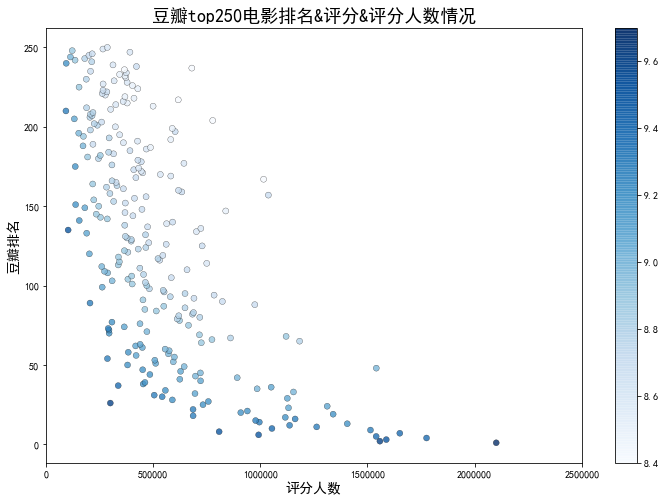

In [36]:
x5 = df['评分人数'].tolist()
y5 = df['评分'].tolist()
z = df['豆瓣排名'].tolist()

plt.figure(figsize=(12, 8))
plt.scatter(x=x5,
            y=z,
            cmap='Blues',
            marker='o',
            c=y5,   # 数字越大，颜色越深，评分越高
            alpha=0.8,
            linewidths=0.3,
            edgecolors='Black')

plt.title('豆瓣top250电影排名&评分&评分人数情况', fontsize=18)
plt.xlabel('评分人数', fontsize=14)
plt.ylabel('豆瓣排名', fontsize=14)
plt.xlim(0, 2500000)
plt.colorbar()

从颜色条可以看出，豆瓣top250电影所有评分都在8分以上，最低评分8.4，从散点图的分布可以看出，豆瓣排名越高，电影的评分人数越多，评分也越高；评分人数大部分在100万以内，其中有一部电影，评分人数超过惊人的200万，可见这部电影有多热门，通过查找，可以得出这部电影是《肖申克的救赎》。

In [37]:
df[df['评分人数'] > 2000000]['电影名称'].values

array(['肖申克的救赎'], dtype=object)

#### 尝试用pyecharts绘制散点图

In [38]:
scatter1 = pe.Scatter('豆瓣评分&评分人数情况分布', title_pos='center',
                      height=500, width=980)

scatter1.add('', x5, z, symbol_size=8, xaxis_name='评分人数',
             yaxis_name='豆瓣排名', yaxis_name_gap=20, yaxis_name_pos='end')
scatter1

In [39]:
scatter2 = pe.Scatter('豆瓣评分&评分人数情况分布', title_pos='center',
                      height=500, width=980)

scatter2.add('', x5, y5, symbol_size=8, xaxis_name='评分人数',
             yaxis_name='豆瓣评分', yaxis_name_gap=20, yaxis_name_pos='end', yaxis_min=8)
scatter2

电影评分在

## 总结

豆瓣top250电影分析这个项目，数据是自己爬虫抓取的，就250条数据，数据量不多，数据也比较干净，不需要做复杂的数据清洗，大部分图表是用 pyecharts 绘制的，这个库绘制出来的图表比较美观，并且可交互。      
整个项目的流程是读取数据——数据概览——数据清洗——数据分析——得出结论。项目过程比较难的地方，是对电影的类型以及制片国家/地区的分析，因为一部电影有可能有多个类型标签，不能简单地把它归到某个具体的类型；一部电影也有可能是由多个国家/地区合作发行的，同样不能直接划分到某个国家/地区。  
其实项目到分析电影的排名/评分/评分人数，用 matplotlib 出图就结束了，最后用pyecharts出图是想做到跟 matplotlib 一样的效果，用散点图的颜色代表分数，但是查了文档和教程，暂时找不到解决方案，所以就画两个图了，此处先放着，后续有解决方案了再改过来。